In [ ]:
!pip uninstall numpy gensim -y  # Clean slate
!pip install numpy==1.23.5     # Stable version for gensim compatibility
!pip install gensim --no-cache-dir  # Avoid cached conflicts

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you 

ERROR: Operation cancelled by user
^C


In [ ]:
!pip install gensim --no-cache-dir  # Avoid cached conflicts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.2 MB/s eta 0:00:00


In [ ]:
import numpy, gensim
print("NumPy:", numpy.__version__)
print("Gensim:", gensim.__version__)

NumPy: 1.23.5
Gensim: 4.3.3


In [ ]:
import gensim.downloader as api

# Show available models
print(list(api.info()['models'].keys()))  # See all available models

# Load a standard pre-trained model (e.g., glove-wiki-gigaword-100)
model = api.load("glove-wiki-gigaword-100")  # 100-dimensional vectors

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
from gensim.models import Word2Vec
import numpy as np

#function to make a list of length n of p's to try
def gen_p_list(n):
    df = []
    for i in range(n):
        i += 1
        df.append(i)
    return df

def calc_p_norm(vec, p):
    init_tot = 0
    for num in vec:
        init_tot += np.power(num, p)
    return np.power(init_tot, 1/p)

def cosine_similarity(vec1, vec2, p=2):
  dot_prod = np.dot(vec1, vec2)
  denom = calc_p_norm(vec1, p)*calc_p_norm(vec2, p)
  return dot_prod / denom

def word_to_vect(word):
  return model[word]

def demo():

  word1 = input("Enter first word: ")
  word2 = input("Enter second word: ")

  vec1 = word_to_vect(word1)
  vec2 = word_to_vect(word2)

  sim = cosine_similarity(vec1, vec2)

  print(f"The cosine similarity between {word1} and {word2} is {sim}")

  print(" ")

  if (sim >= -1 and sim <= -0.8):
    print("Very dissimilar!")
  elif (sim > -0.8 and sim <= -0.6):
    print("Dissimilar!")
  elif (sim > -0.6 and sim <= -0.4):
    print("Somewhat dissimilar!")
  elif (sim > -0.4 and sim <= -0.2):
    print("a bit different")
  elif (sim > -0.2 and sim <= 0.2):
    print("pretty much unrelated!")
  elif (sim > 0.2 and sim <= 0.4):
    print("a bit similar")
  elif (sim > 0.4 and sim <= 0.6):
    print("Somewhat similar!")
  elif (sim > 0.6 and sim <= 0.8):
    print("Similar!")
  elif(sim > 0.8 and sim <= 1):
    print("Very similar!")

In [ ]:
demo()

Enter first word: all
Enter second word: none
The cosine similarity between all and none is 0.7460398165570833
 
Similar!


In [ ]:
scale = ["none", "few", "some", "many", "most", "all"]

def avg_dist_calc(scale_df, degree):
    tested_pairs = set()  # Using set for O(1) lookups
    total_sim = 0
    count = 0

    for i in range(len(scale_df) - degree):  # Prevent index overflow
        word1 = scale_df[i]
        word2 = scale_df[i + degree]

        # Use frozenset to treat [a,b] and [b,a] as same pair
        pair = frozenset({word1, word2})

        if pair not in tested_pairs:
            tested_pairs.add(pair)
            try:
                total_sim += cosine_similarity(word_to_vect(word1), word_to_vect(word2))
                count += 1
            except KeyError:  # Handle case where word isn't in vocabulary
                continue

    return total_sim / count if count > 0 else 0  # Prevent division by zero

# Loop over degrees of separation (1 = adjacent, up to N-1)
for degree in range(1, len(scale)):
    sim = avg_dist_calc(scale, degree)
    print(f"Avg similarity for degree {degree} (pairs {degree} apart): {sim:.4f}")
    print(" ")
    for i in range(len(scale) - degree):
        word1 = scale[i]
        word2 = scale[i + degree]
        print(f"{word1} + {word2}: {cosine_similarity(word_to_vect(word1), word_to_vect(word2))}")
    print(" ")

Avg similarity for degree 1 (pairs 1 apart): 0.8568
 
none + few: 0.7538410684193279
few + some: 0.8884153885602255
some + many: 0.9219032765482575
many + most: 0.8988995994561041
most + all: 0.8211018651362868
 
Avg similarity for degree 2 (pairs 2 apart): 0.8257
 
none + some: 0.7108127941345243
few + many: 0.9036631230269119
some + most: 0.8516406270152955
many + all: 0.836660475491019
 
Avg similarity for degree 3 (pairs 3 apart): 0.8001
 
none + many: 0.6992586500323997
few + most: 0.8498248350383701
some + all: 0.8511674579550786
 
Avg similarity for degree 4 (pairs 4 apart): 0.7539
 
none + most: 0.6935907635095849
few + all: 0.8141359918554464
 
Avg similarity for degree 5 (pairs 5 apart): 0.7460
 
none + all: 0.7460398165570833
 


In [ ]:
print(avg_dist_calc(scale, 1))

0.8568322396240404


In [ ]:
scale = ["none", "few", "some", "many", "most", "all"]

def print_p_norms(scale, p=2):
  for word in scale:
    vec = word_to_vect(word)
    print(f" '{word}' L{p} norm: {calc_p_norm(vec, p)}")

print_p_norms(scale)

 'none' L2 norm: 4.570507371689071
 'few' L2 norm: 5.290614808295037
 'some' L2 norm: 5.8508208945974305
 'many' L2 norm: 5.876538299284469
 'most' L2 norm: 5.806868257467635
 'all' L2 norm: 5.780202831985565


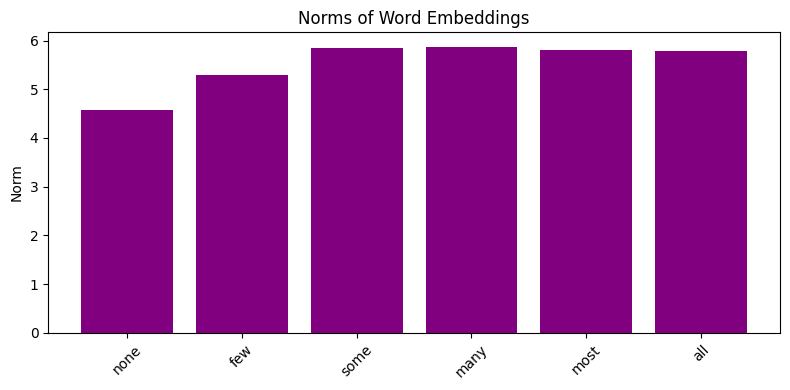

In [ ]:
def get_norm_df(scale, p=2):
  norm_df = []
  for word in scale:
    vec = word_to_vect(word)
    norm_df.append(calc_p_norm(vec, p))
  return norm_df

def plot_norms(norm_df, scale, title="Norms of Word Embeddings", color='purple'):

    x = np.arange(len(scale))

    plt.figure(figsize=(8, 4))
    plt.bar(x, norm_df, color=color)
    plt.xticks(x, scale, rotation=45)
    plt.ylabel("Norm")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_norms(get_norm_df(scale), scale)

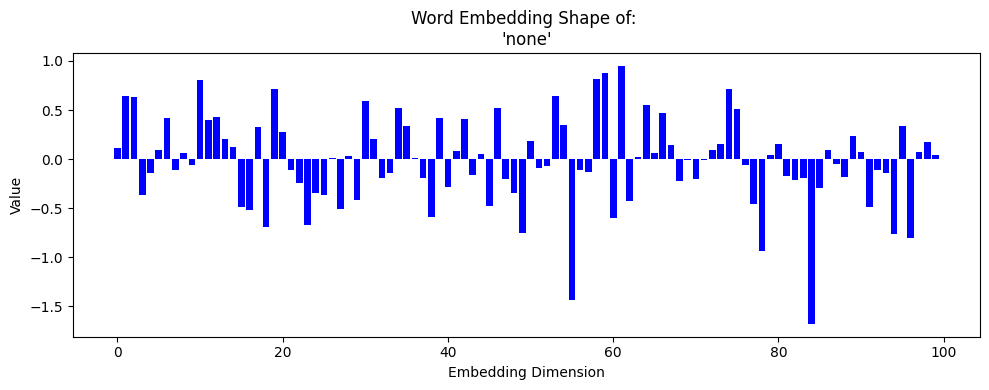

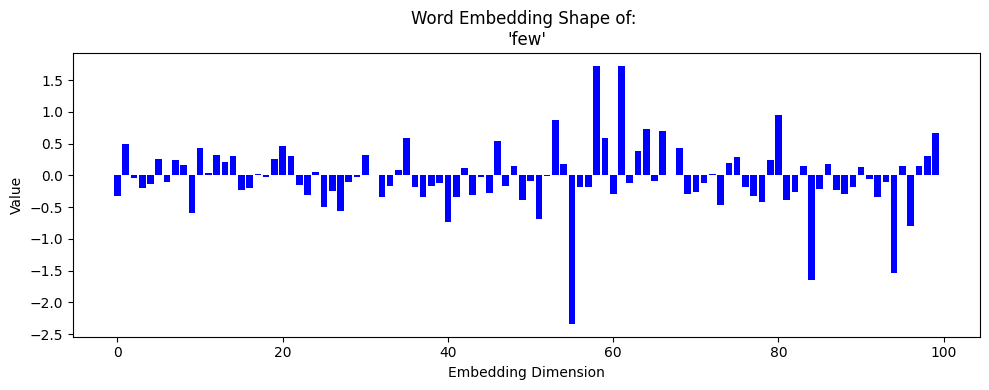

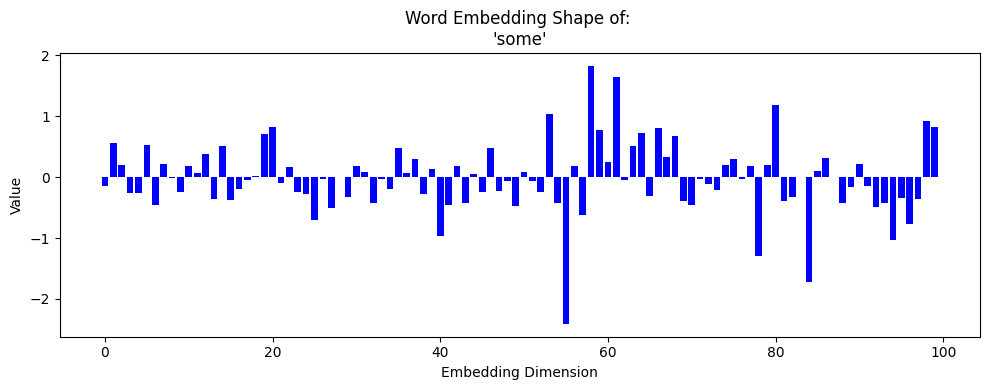

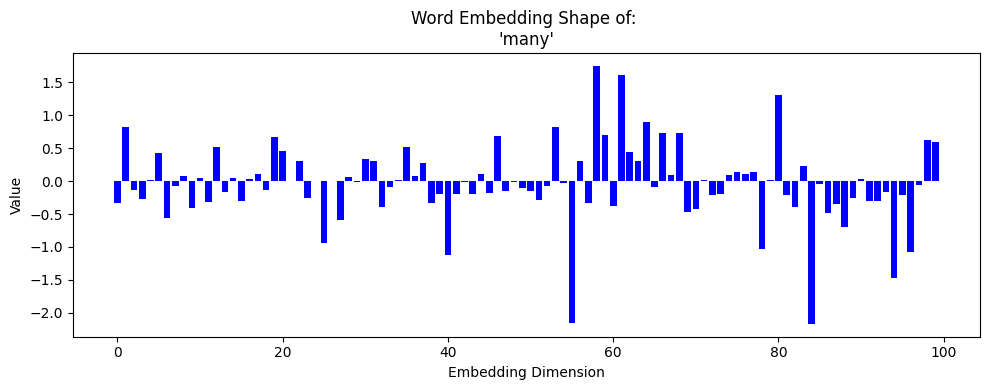

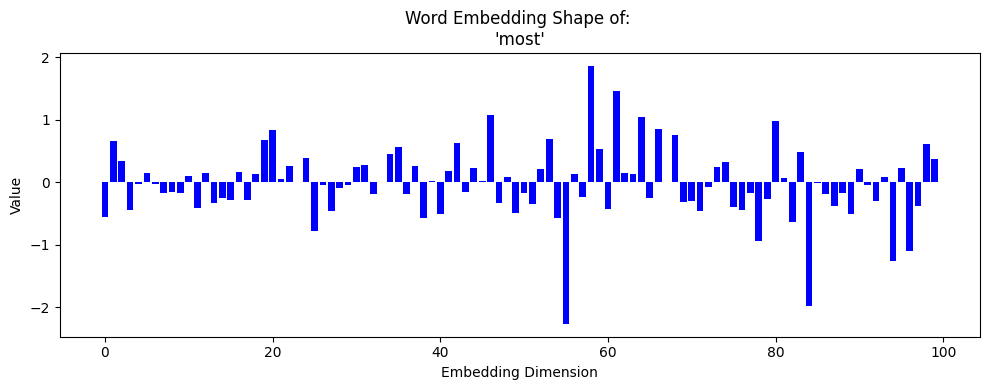

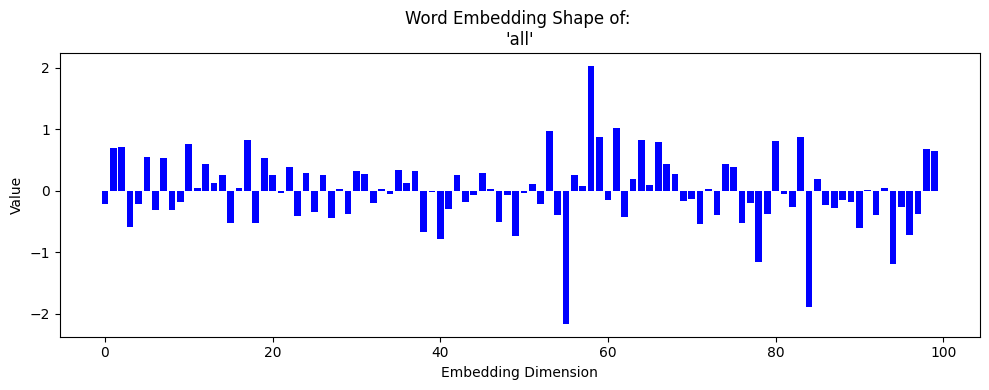

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_embedding_shape(word, title=None, color='blue'):
    if title is None:
        title = f"Word Embedding Shape of: \n'{word}'"

    vec = word_to_vect(word)
    # Convert to NumPy array in case it's not already
    vec = np.array(vec)
    dim = len(vec)

    # Create x-axis values (0 to dim-1)
    x = np.arange(dim)

    # Plot bar chart
    plt.figure(figsize=(10, 4))
    plt.bar(x, vec, color=color)
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Value")
    plt.title(title)
    plt.tight_layout()
    plt.show()

for word in scale:
  plot_embedding_shape(word)

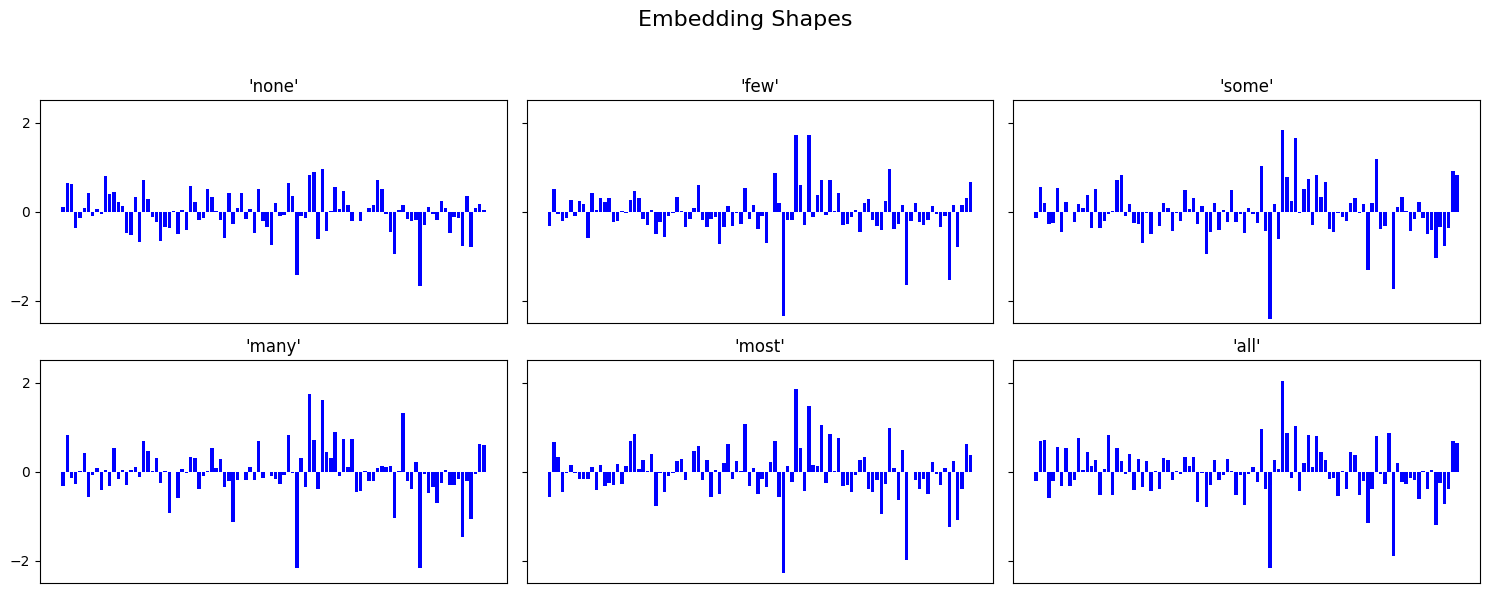

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_embedding_grid(words, color='blue', y_lim=(-2.5, 2.5)):
    """
    Plots a 2x3 grid of bar charts showing the embedding shape for each word.

    Parameters:
        words (list of str): List of words to visualize.
        color (str): Bar color.
        y_lim (tuple): Fixed y-axis limits for all subplots.
    """
    assert len(words) == 6, "This function expects exactly 6 words."

    fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharey=True)

    for idx, word in enumerate(words):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        try:
            vec = word_to_vect(word)
            vec = np.array(vec)
            x = np.arange(len(vec))
            ax.bar(x, vec, color=color)
            ax.set_title(f"'{word}'", fontsize=12)
            ax.set_ylim(*y_lim)
            ax.set_xticks([])
            ax.set_yticks([-2, 0, 2])
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{word}", ha='center', va='center', fontsize=10)
            ax.set_title(f"'{word}'", fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])

    fig.suptitle("Embedding Shapes", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_embedding_grid(scale)

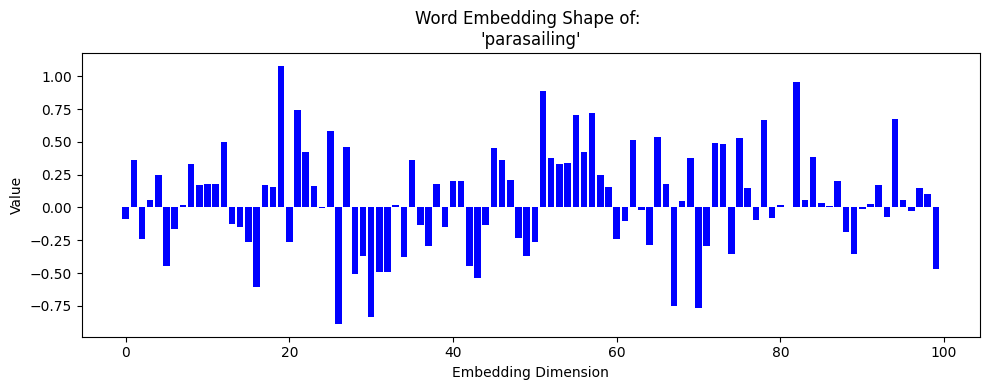

In [ ]:
ex_word = "parasailing"

plot_embedding_shape(ex_word)

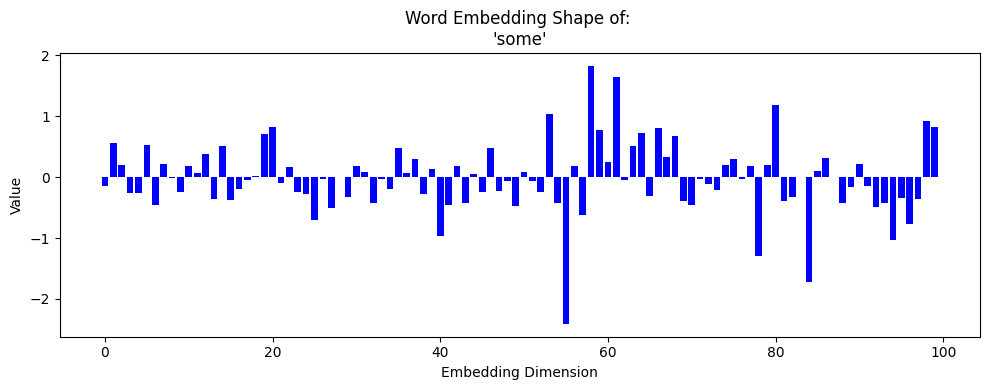

In [ ]:
word = "some"

plot_embedding_shape(word)

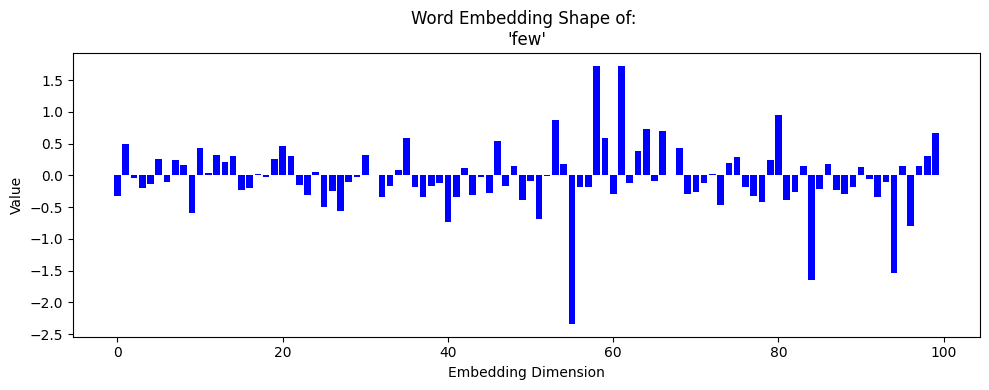

In [ ]:
word2 = "few"

plot_embedding_shape(word2)

In [ ]:
!pip install transformers


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load BERT base model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def embed_sentence(sentence):
    """
    Returns token-level BERT embeddings for a given sentence.

    Output:
        tokens: list of str tokens
        embeddings: torch.Tensor of shape [num_tokens, 768]
    """
    # Tokenize and get input IDs
    inputs = tokenizer(sentence, return_tensors='pt')

    # Forward pass through the model (no gradient tracking needed)
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the last hidden state
    last_hidden_state = outputs.last_hidden_state  # shape: [1, tokens, 768]

    # Convert to 2D tensor: [num_tokens, 768]
    embeddings = last_hidden_state.squeeze(0)

    # Get readable tokens (with subwords like ##ing)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    return tokens, embeddings


RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
module 'numpy' has no attribute 'dtypes'

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.24.4

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is inc

In [ ]:
# Fully remove numpy from memory BEFORE transformers gets imported
import sys
sys.modules.pop('numpy', None)
sys.modules.pop('numpy.dtypes', None)
sys.modules.pop('numpy.core', None)

!pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0